# 01deg_jra55v140_iaf_cycle4_repro_test

See

https://forum.access-hive.org.au/t/inconsistent-ocean-and-sea-ice-in-final-7-5yr-of-0-1-iaf-cycle-4

https://github.com/COSIMA/access-om2/issues/266#issuecomment-1756828895

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
session = cc.database.create_session()

In [3]:
repro_session = cc.database.create_session('/g/data/v45/aek156/notebooks/github/aekiss/notebooks/01deg_jra55v140_iaf_cycle4_repro_test.db')

In [4]:
directory_list=['/scratch/v45/aek156/access-om2/archive/01deg_jra55v140_iaf_cycle4_repro_test']

cc.database.build_index(directory_list, repro_session)

Indexing experiment: 01deg_jra55v140_iaf_cycle4_repro_test


0

In [5]:
control = cc.querying.getvar('01deg_jra55v140_iaf_cycle4', 'sea_level', session,
                             frequency='1 daily',
                             start_time='2011-07-01', end_time='2011-10-01'
                            ).sel(time=slice('2011-07-01', '2011-10-01'))

In [6]:
repro = cc.querying.getvar('01deg_jra55v140_iaf_cycle4_repro_test', 'sea_level', repro_session,
                           frequency='1 daily',
                           start_time='2011-07-01', end_time='2011-10-01'
                          ).sel(time=slice('2011-07-01', '2011-10-01'))

In [7]:
diff = repro-control
absdiff = abs(diff)

In [8]:
ts = absdiff.max(dim=['xt_ocean','yt_ocean'], keep_attrs=True)

 first differs at 2011-09-27T12:00:00.000000000


Text(0.5, 1.0, 'sea_level max absolute difference')

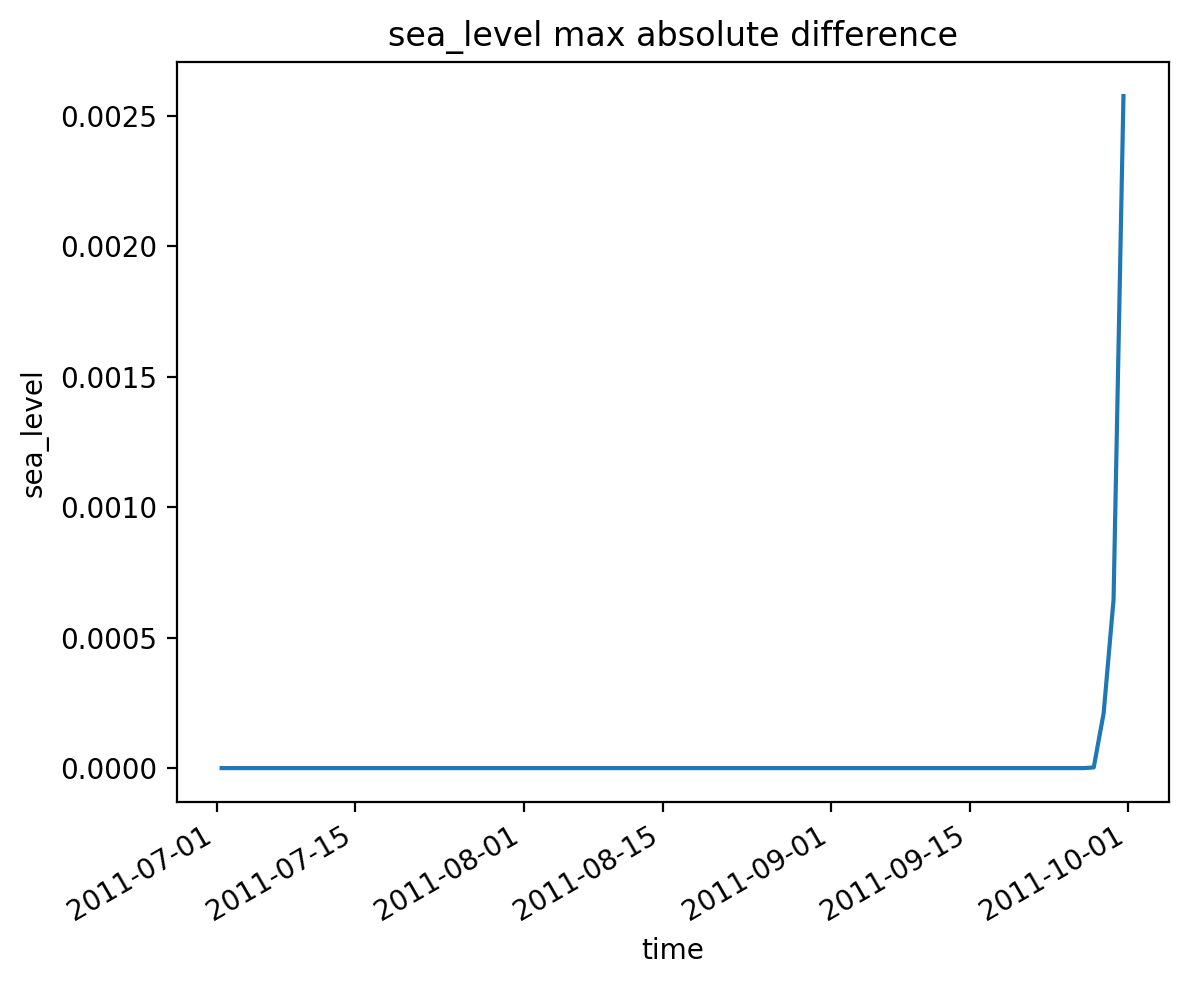

In [9]:
ts_nonzero = (ts != 0.0).compute()
ts_nonzero_times = ts.where(ts_nonzero, drop=True).time.values
if len(ts_nonzero_times) > 0:
    print(' first differs at', repr(ts_nonzero_times[0]).split("'")[1])
else:
    print(' identical')
plt.figure()
ts.plot()
plt.title('sea_level max absolute difference')

In [10]:
logdiff = np.log(absdiff.sel(time=slice('2011-09-26', '2011-09-30'))).compute()

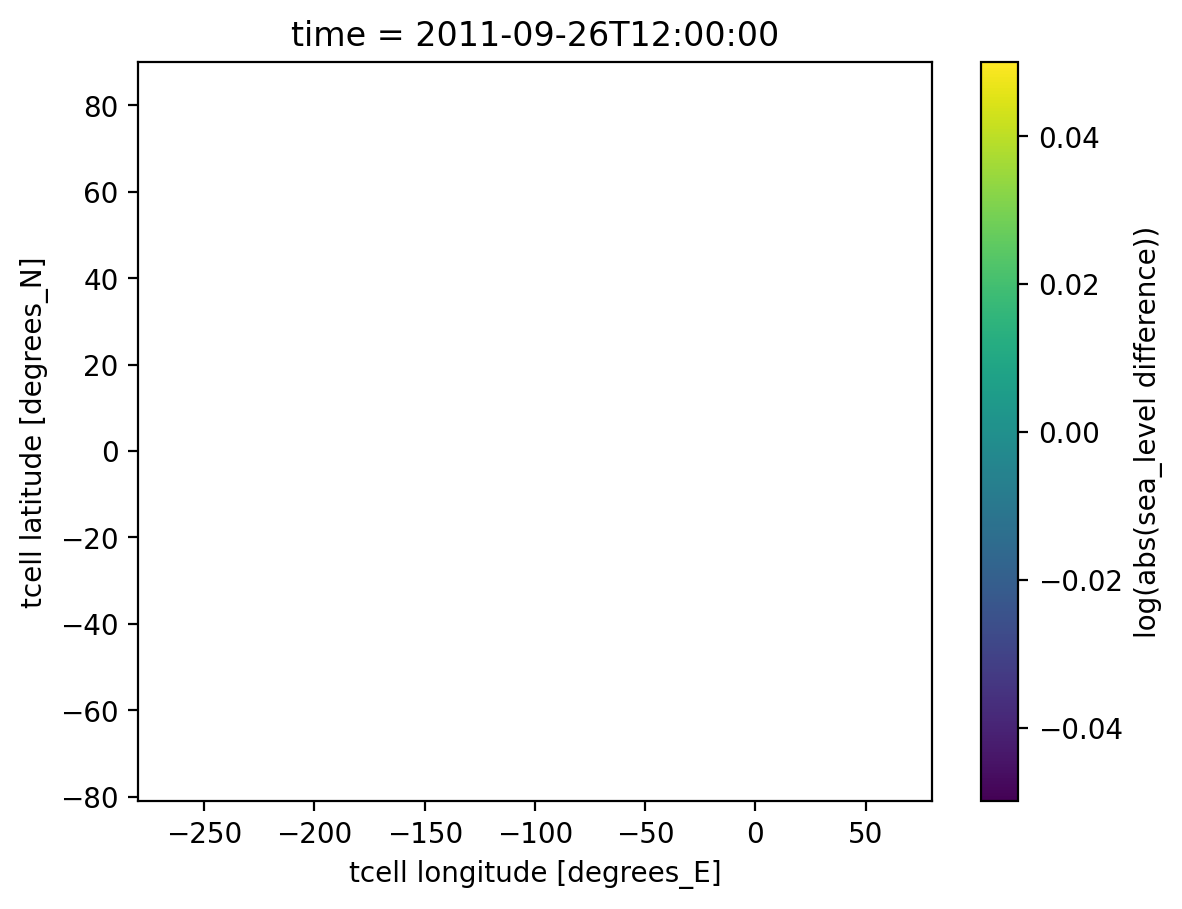

In [12]:
logdiff.sel(time='2011-09-26').plot(cbar_kwargs={'label': 'log(abs(sea_level difference))'})

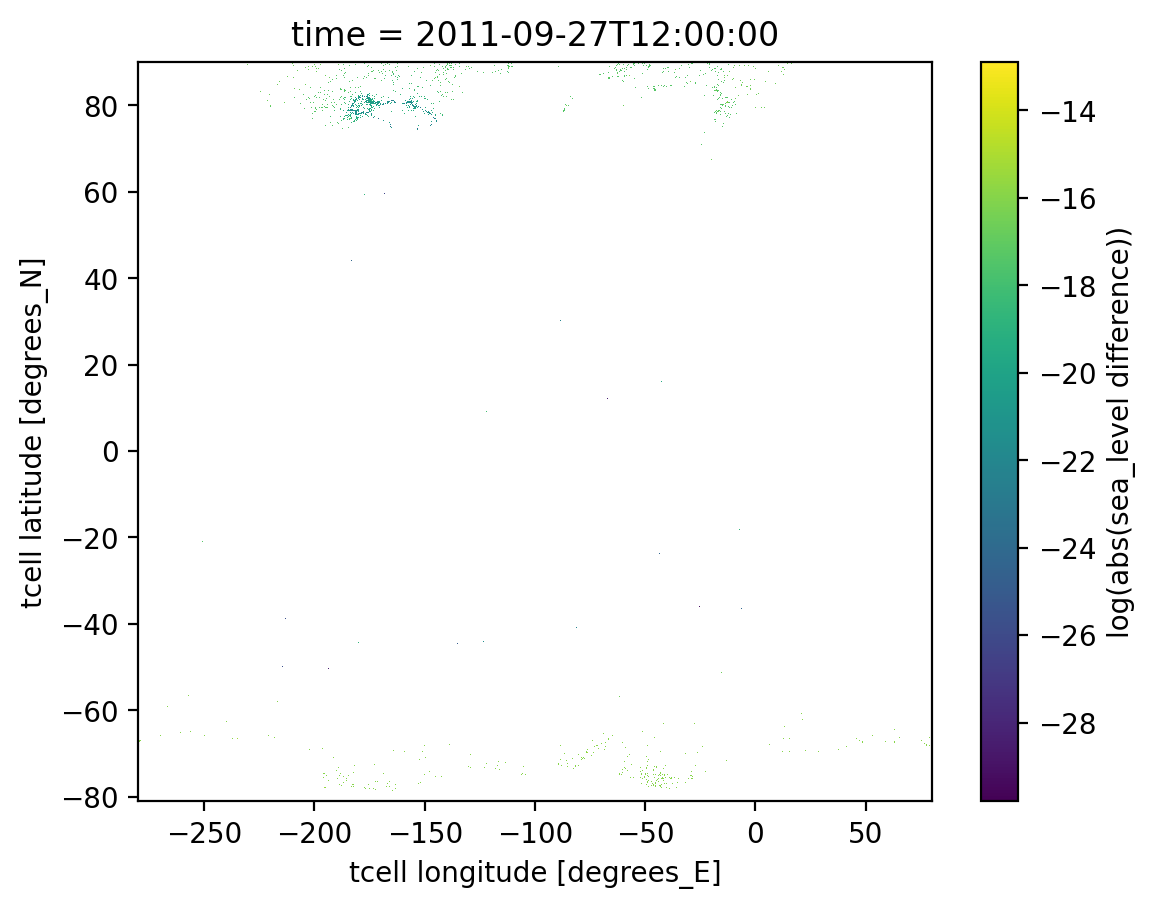

In [13]:
logdiff.sel(time='2011-09-27').plot(cbar_kwargs={'label': 'log(abs(sea_level difference))'})

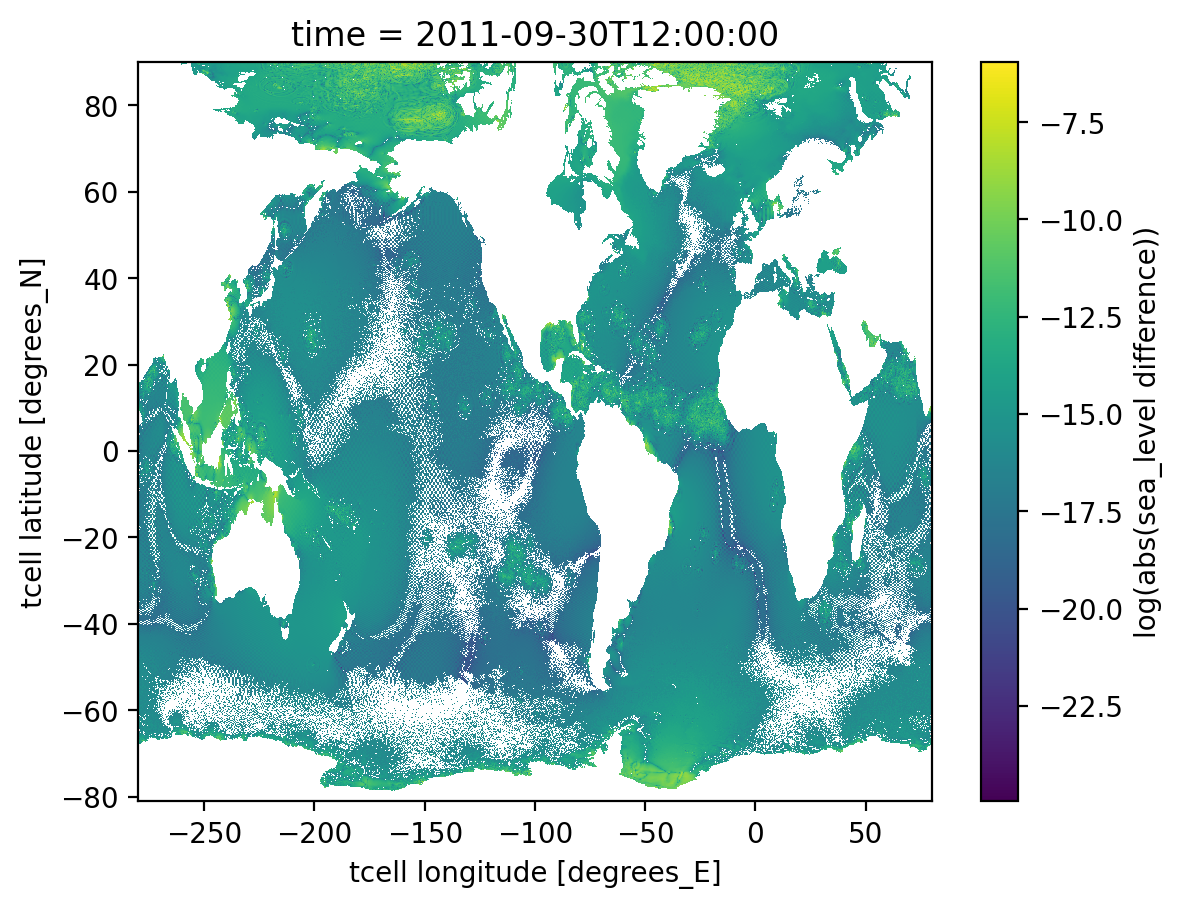

In [14]:
logdiff.sel(time='2011-09-30').plot(cbar_kwargs={'label': 'log(abs(sea_level difference))'})

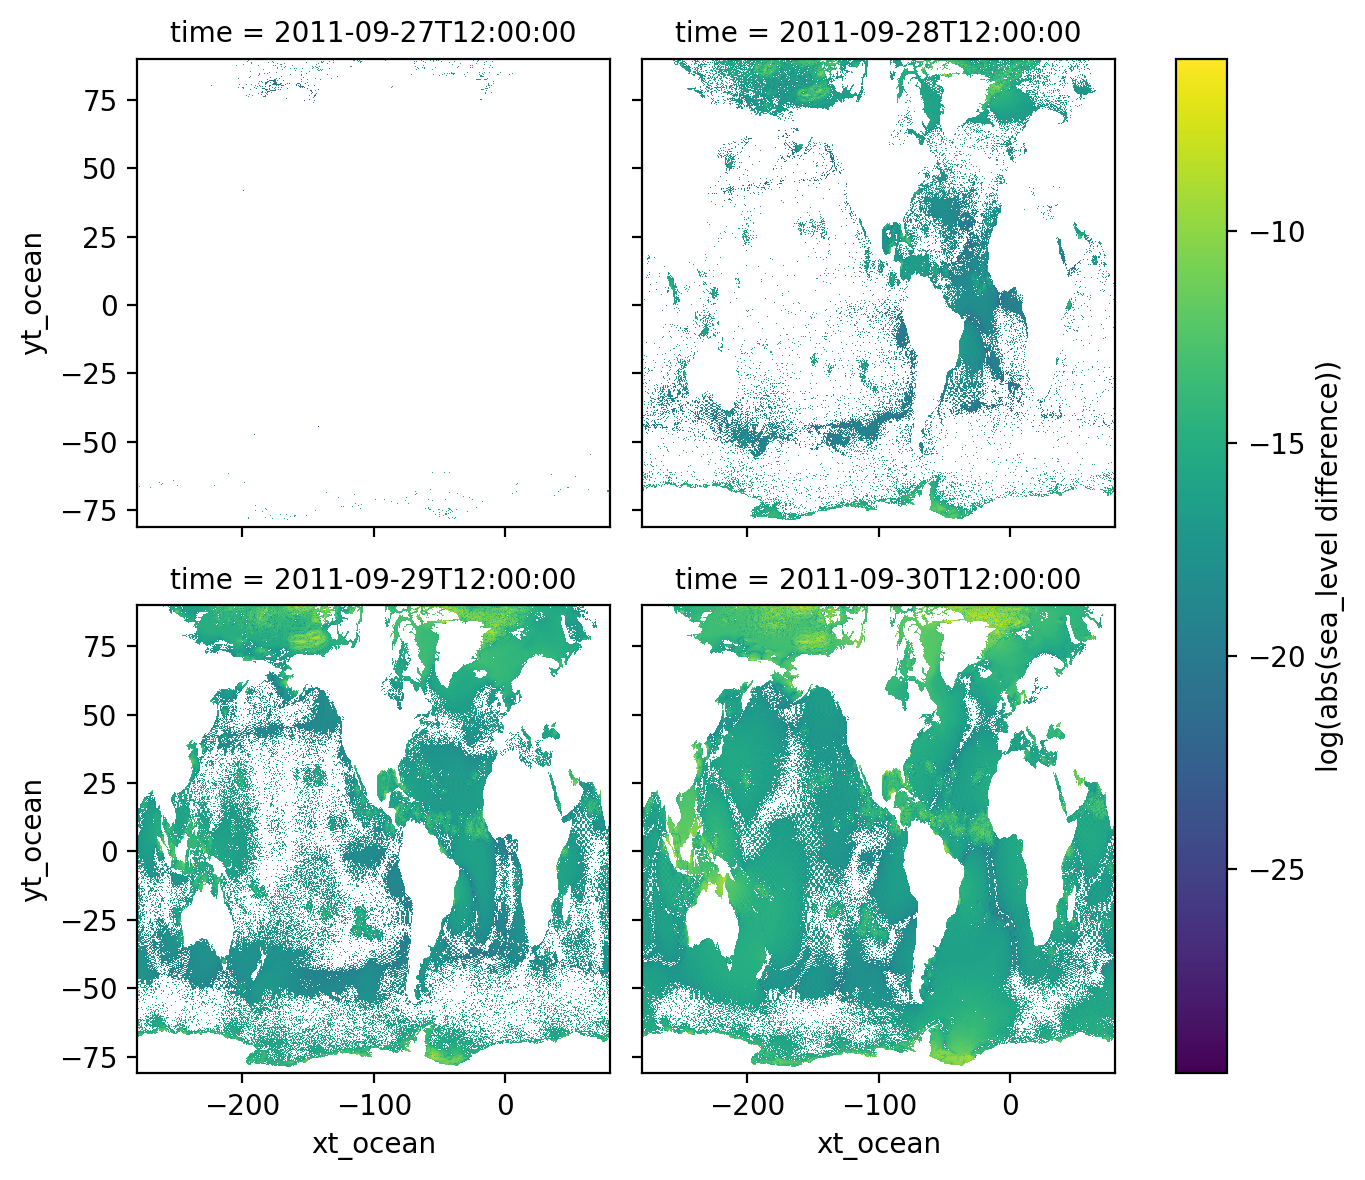

In [15]:
logdiff.sel(time=slice('2011-09-27', '2011-09-30')).plot(col='time', col_wrap=2, cbar_kwargs={'label': 'log(abs(sea_level difference))'})